In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('weatherHistory.csv')

In [3]:
dataset=dataset[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Wind Bearing (degrees)','Pressure (millibars)','Apparent Temperature (C)']]

In [4]:
dataset

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Wind Bearing (degrees),Pressure (millibars),Apparent Temperature (C)
0,9.472222,0.89,14.1197,15.8263,251.0,1015.13,7.388889
1,9.355556,0.86,14.2646,15.8263,259.0,1015.63,7.227778
2,9.377778,0.89,3.9284,14.9569,204.0,1015.94,9.377778
3,8.288889,0.83,14.1036,15.8263,269.0,1016.41,5.944444
4,8.755556,0.83,11.0446,15.8263,259.0,1016.51,6.977778
...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,16.1000,31.0,1014.36,26.016667
96449,24.583333,0.48,10.0947,15.5526,20.0,1015.16,24.583333
96450,22.038889,0.56,8.9838,16.1000,30.0,1015.66,22.038889
96451,21.522222,0.60,10.5294,16.1000,20.0,1015.95,21.522222


In [5]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [7]:
#Standardize the feature
x1= (dataset.iloc[:,0] - dataset.iloc[:,0].mean())/dataset.iloc[:,0].std()
x2= (dataset.iloc[:,1] - dataset.iloc[:,1].mean())/dataset.iloc[:,1].std()
x3= (dataset.iloc[:,2] - dataset.iloc[:,2].mean())/dataset.iloc[:,2].std()
x4= (dataset.iloc[:,3] - dataset.iloc[:,3].mean())/dataset.iloc[:,3].std()
x5= (dataset.iloc[:,4] - dataset.iloc[:,4].mean())/dataset.iloc[:,4].std()
x6= (dataset.iloc[:,5] - dataset.iloc[:,5].mean())/dataset.iloc[:,5].std()

In [10]:
X=pd.concat([x1,x2,x3,x4,x5],axis=1)
X=np.array(X)
X

array([[-0.25759768,  0.79346631,  0.47863251,  1.306969  ,  0.59125294],
       [-0.26981211,  0.63999223,  0.49959129,  1.306969  ,  0.66575233],
       [-0.26748555,  0.79346631, -0.99546821,  1.09958006,  0.15356902],
       ...,
       [ 1.05807061, -0.89474863, -0.26423973,  1.37225812, -1.46679273],
       [ 1.00397815, -0.69011652, -0.04067943,  1.37225812, -1.55991697],
       [ 0.89055847, -0.63895849, -0.71368908,  1.23399882, -1.38298092]])

In [11]:
train_index = int(0.6 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
Y_train, Y_test = Y[:train_index], Y[train_index:]

In [12]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(57871, 5) (38582, 5) (57871,) (38582,)


In [13]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list


In [17]:
w, b, c= GradientDescent(X_train, Y_train, np.zeros(X_train.shape[1]), 0, 0.001,epochs=5000)

Cost is: 117.75356088750793
Cost is: 38.008331264543294
Cost is: 15.385178352685298
Cost is: 7.517600099684573
Cost is: 4.3224579109071275
Cost is: 2.8366355813682533
Cost is: 2.0518271684635065
Cost is: 1.5893765104518718
Cost is: 1.294058591183242
Cost is: 1.09552000594452


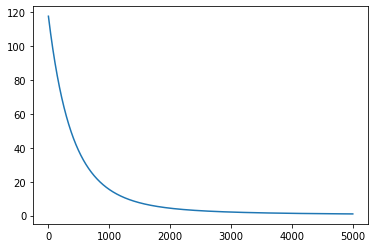

In [18]:
plt.plot(c)

In [19]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(X_test, w, b)

In [21]:
def r(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r(y_pred, Y_test)

0.9818997954797043

In [23]:
def rmse(y_pred, y):
    rmse = (((y - y_pred)**2).mean())**(1/2)
    return rmse
rmse(y_pred, Y_test)

1.3394564241351656